# Spitfire Example: nonadiabatic flamelet profiles

This example shows selected profiles of the temperature, mass fractions, and enthalpy defect of several nonadiabatic flamelet tabulation techniques for n-heptane chemistry.

In [1]:
from spitfire import (ChemicalMechanismSpec, 
                      build_nonadiabatic_defect_eq_library, 
                      build_nonadiabatic_defect_bs_library, 
                      build_nonadiabatic_defect_transient_slfm_library,
                      build_nonadiabatic_defect_steady_slfm_library)
import matplotlib.pyplot as plt
import numpy as np

mech = ChemicalMechanismSpec(cantera_xml='heptane-liu-hewson-chen-pitsch-highT.xml', group_name='gas')
pressure = 101325.
air = mech.stream(stp_air=True)
air.TP = 300., pressure
fuel = mech.stream('TPX', (485., pressure, 'NXC7H16:1'))

flamelet_specs = {'mech_spec': mech, 'oxy_stream': air, 'fuel_stream': fuel, 'grid_points': 128}

In [2]:
l2 = build_nonadiabatic_defect_bs_library(flamelet_specs, verbose=False)
l1 = build_nonadiabatic_defect_eq_library(flamelet_specs, verbose=False)

In [ ]:
for ig in range(l1.enthalpy_defect_stoich_npts):
    plt.plot(l1.mixture_fraction_values, l1['enthalpy_defect'][:, ig] * 1.e-6)
plt.grid()
plt.title('nonadiabatic (defect only) equilibrium')
plt.ylabel('enthalpy defect (MJ/kg)')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(l1.enthalpy_defect_stoich_npts):
    plt.plot(l1.mixture_fraction_values, l1['enthalpy'][:, ig] * 1.e-6)
plt.grid()
plt.title('nonadiabatic (defect only) equilibrium')
plt.ylabel('specific enthalpy MJ/kg')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(l1.enthalpy_defect_stoich_npts):
    plt.plot(l1.mixture_fraction_values, l1['temperature'][:, ig])
plt.grid()
plt.ylabel('T (K)')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(l1.enthalpy_defect_stoich_npts):
    plt.plot(l1.mixture_fraction_values, l1['mass fraction OH'][:, ig])
plt.grid()
plt.ylabel('mass fraction OH')
plt.xlabel('mixture fraction')
plt.xlim([0, 0.2])
plt.show()

In [ ]:
for ig in range(l2.enthalpy_defect_stoich_npts):
    plt.plot(l2.mixture_fraction_values, l2['enthalpy_defect'][:, ig] * 1.e-6, '--')
plt.grid()
plt.title('nonadiabatic (defect only) Burke-Schumann')
plt.ylabel('specific enthalpy MJ/kg')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(l2.enthalpy_defect_stoich_npts):
    plt.plot(l2.mixture_fraction_values, l2['temperature'][:, ig], '--')
plt.grid()
plt.ylabel('T (K)')
plt.xlabel('mixture fraction')
plt.show()

In [ ]:
l3 = build_nonadiabatic_defect_transient_slfm_library(flamelet_specs, 
                                                      verbose=True, 
                                                      diss_rate_values=np.array([1e-2, 1e-1, 1e0, 1e1, 1e2]))

In [2]:
l4 = build_nonadiabatic_defect_steady_slfm_library(flamelet_specs, 
                                                   verbose=True, 
                                                   diss_rate_values=np.array([1e-2, 1e-1, 1e0, 1e1, 1e2]),
                                                   solver_verbose=False,
                                                   h_stoich_spacing=1.e-3)

----------------------------------------------------------------------------------
building nonadiabatic (defect) SLFM library
----------------------------------------------------------------------------------
- mechanism: heptane-liu-hewson-chen-pitsch-highT.xml
- 38 species, 105 reactions
- stoichiometric mixture fraction: 0.062
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
building adiabatic SLFM library
----------------------------------------------------------------------------------
- mechanism: heptane-liu-hewson-chen-pitsch-highT.xml
- 38 species, 105 reactions
- stoichiometric mixture fraction: 0.062
----------------------------------------------------------------------------------
   1/   5 (chi_stoich =  1.0e-02 1/s)  converged in   3.67 s, T_max = 2249.2
   2/   5 (chi_stoich =  1.0e-01 1/s)  converged in   0.15 s, T_max = 2186.1
   3/   5 (chi_stoich =  1

In [ ]:
for ig in range(0, l3.enthalpy_defect_stoich_npts, 2):
    plt.plot(l3.mixture_fraction_values, l3['enthalpy_defect'][:, 0, ig] * 1.e-6)
plt.grid()
plt.title(f'nonadiabatic (defect only, transient extinction) SLFM, chi_stoich = {l3.dissipation_rate_stoich_values[0]:.2e} Hz')
plt.ylabel('specific enthalpy MJ/kg')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(0, l3.enthalpy_defect_stoich_npts, 2):
    plt.plot(l3.mixture_fraction_values, l3['temperature'][:, 0, ig])
plt.grid()
plt.ylabel('T (K)')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(0, l3.enthalpy_defect_stoich_npts, 2):
    plt.plot(l3.mixture_fraction_values, l3['mass fraction OH'][:, 0, ig])
plt.grid()
plt.ylabel('mass fraction OH')
plt.xlabel('mixture fraction')
plt.xlim([0, 0.2])
plt.show()

In [ ]:
for ig in range(0, l3.enthalpy_defect_stoich_npts, 2):
    plt.plot(l3.mixture_fraction_values, l3['enthalpy_defect'][:, -1, ig] * 1.e-6)
plt.grid()
plt.title(f'nonadiabatic (defect only, transient extinction) SLFM, chi_stoich = {l3.dissipation_rate_stoich_values[-1]:.2e} Hz')
plt.ylabel('specific enthalpy MJ/kg')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(0, l3.enthalpy_defect_stoich_npts, 2):
    plt.plot(l3.mixture_fraction_values, l3['temperature'][:, -1, ig])
plt.grid()
plt.ylabel('T (K)')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(0, l3.enthalpy_defect_stoich_npts, 2):
    plt.plot(l3.mixture_fraction_values, l3['mass fraction OH'][:, -1, ig])
plt.grid()
plt.ylabel('mass fraction OH')
plt.xlabel('mixture fraction')
plt.xlim([0, 0.2])
plt.show()

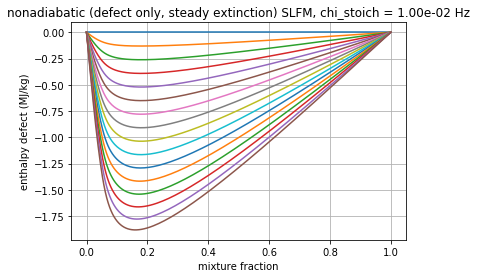

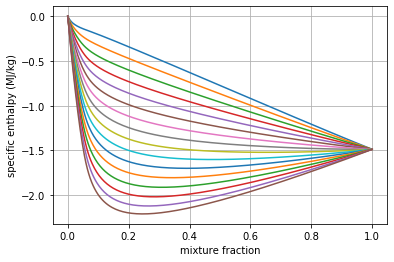

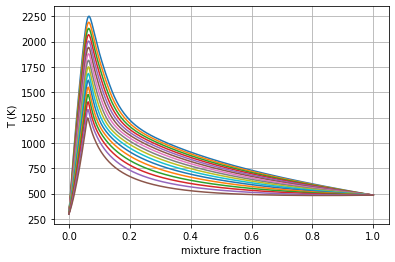

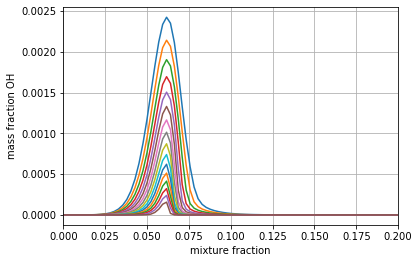

In [3]:
for ig in range(0, l4.enthalpy_defect_stoich_npts, 2):
    plt.plot(l4.mixture_fraction_values, l4['enthalpy_defect'][:, 0, ig] * 1.e-6)
plt.grid()
plt.title(f'nonadiabatic (defect only, steady extinction) SLFM, chi_stoich = {l4.dissipation_rate_stoich_values[0]:.2e} Hz')
plt.ylabel('enthalpy defect (MJ/kg)')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(0, l4.enthalpy_defect_stoich_npts, 2):
    plt.plot(l4.mixture_fraction_values, l4['enthalpy'][:, 0, ig] * 1.e-6)
plt.grid()
plt.ylabel('specific enthalpy (MJ/kg)')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(0, l4.enthalpy_defect_stoich_npts, 2):
    plt.plot(l4.mixture_fraction_values, l4['temperature'][:, 0, ig])
plt.grid()
plt.ylabel('T (K)')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(0, l4.enthalpy_defect_stoich_npts, 2):
    plt.plot(l4.mixture_fraction_values, l4['mass fraction OH'][:, 0, ig])
plt.grid()
plt.ylabel('mass fraction OH')
plt.xlabel('mixture fraction')
plt.xlim([0, 0.2])
plt.show()

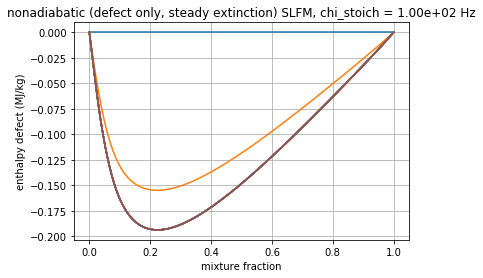

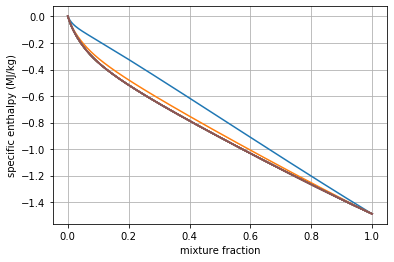

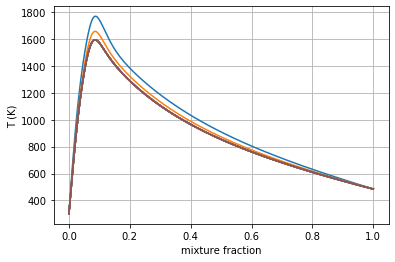

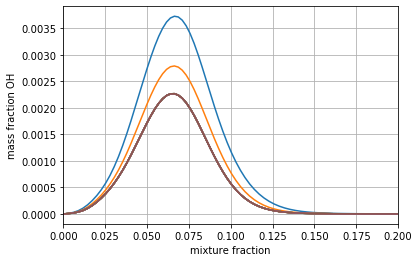

In [4]:
ix = -1

for ig in range(0, l4.enthalpy_defect_stoich_npts, 2):
    plt.plot(l4.mixture_fraction_values, l4['enthalpy_defect'][:, ix, ig] * 1.e-6)
plt.grid()
plt.title(f'nonadiabatic (defect only, steady extinction) SLFM, chi_stoich = {l4.dissipation_rate_stoich_values[ix]:.2e} Hz')
plt.ylabel('enthalpy defect (MJ/kg)')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(0, l4.enthalpy_defect_stoich_npts, 2):
    plt.plot(l4.mixture_fraction_values, l4['enthalpy'][:, ix, ig] * 1.e-6)
plt.grid()
plt.ylabel('specific enthalpy (MJ/kg)')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(0, l4.enthalpy_defect_stoich_npts, 2):
    plt.plot(l4.mixture_fraction_values, l4['temperature'][:, ix, ig])
plt.grid()
plt.ylabel('T (K)')
plt.xlabel('mixture fraction')
plt.show()

for ig in range(0, l4.enthalpy_defect_stoich_npts, 2):
    plt.plot(l4.mixture_fraction_values, l4['mass fraction OH'][:, ix, ig])
plt.grid()
plt.ylabel('mass fraction OH')
plt.xlabel('mixture fraction')
plt.xlim([0, 0.2])
plt.show()

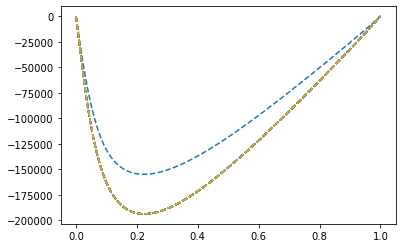

In [5]:
%matplotlib inline
# plt.plot(l4.mixture_fraction_values, l4['enthalpy_defect'][:, -1, 0], '-')
plt.plot(l4.mixture_fraction_values, l4['enthalpy_defect'][:, -1, -30:-1], '--')
# plt.plot(l4.mixture_fraction_values, l4['enthalpy_defect'][:, -1, :], ':')
plt.show()